## Стаитстические тесты и проверка гипотез, доверительные интервалы

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

In [2]:
sample_1 = st.norm(1, 1).rvs(1000)
sample_2 = st.expon(scale=1).rvs(1000)

<Axes: ylabel='Count'>

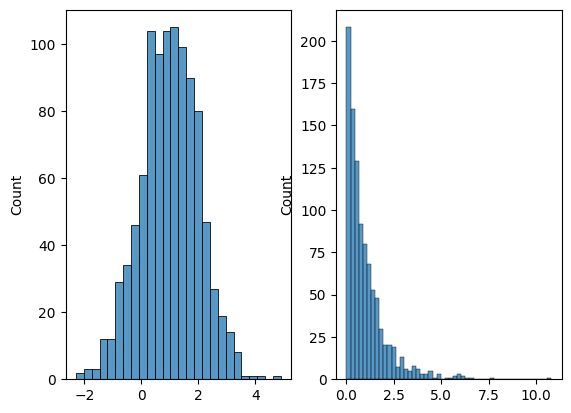

In [3]:
fig, ax = plt.subplots(1, 2)
sns.histplot(sample_1, ax=ax[0])
sns.histplot(sample_2, ax=ax[1])

In [10]:
st.ttest_ind(sample_1, sample_2)

TtestResult(statistic=-1.2686441646074804, pvalue=0.20471578904627077, df=1998.0)

In [14]:
st.mannwhitneyu(sample_1, sample_2)

MannwhitneyuResult(statistic=521988.0, pvalue=0.088620704902801)

## Провести двухвыборочный t-тест, оценить t-статистику и p-значение

$$
\huge
t = \frac{\mu_1 - \mu_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

In [9]:
data_1 = load('data_1.joblib')
data_2 = load('data_2.joblib')

In [14]:
se_1 = round(data_1.var() / len(data_1), 2)
se_2 = round(data_2.var() / len(data_2), 2)

In [15]:
t_stat = round((data_2.mean() - data_1.mean()) / np.sqrt(se_1 + se_2), 3)
t_stat

2.842

In [16]:
p_value = round(1 - st.t(len(data_1) - 1).cdf(t_stat), 3)
p_value

0.002

## Проверка гипотезы о среднем  
### выборка: 9, 5, 7, 7, 4, 10 

$$
\huge
\begin{align*}
H_0: & \, \mu = 6 \\
H_1: & \, \mu > 6
\end{align*}
$$

In [32]:
sample = np.array([9, 5, 7, 7, 4, 10])
mu0 = 6
n = len(sample)
x_mean = sample.mean()
sigma = 1
alpha = 0.01

In [33]:
z_stat = (x_mean - mu0) / (sigma/np.sqrt(n))
z_stat

2.449489742783178

In [34]:
z_crit = (st.norm(0, 1).ppf(1 - alpha)).round(2)
z_crit

2.33

## Найти 99% доверительный интервал для выборки 9, 5, 7, 7, 4, 10

$$
\Large
\left(\bar{x} - {\Delta} \right); \left(\bar{x} + {\Delta} \right)
$$

$$
\Large
{\Delta} = \frac{\sigma}{\sqrt{n}} z_{1 - \frac{\alpha}{2}}
$$

$$
\Large
\left(\bar{x} - \frac{\sigma}{\sqrt{n}} z_{1 - \frac{\alpha}{2}} \right); \left(\bar{x} + \frac{\sigma}{\sqrt{n}} z_{1 - \frac{\alpha}{2}} \right)
$$

In [35]:
sample = np.array([9, 5, 7, 7, 4, 10])
mu0 = 6
n = len(sample)
x_mean = sample.mean()
sigma = 1
alpha = 0.01

In [39]:
z_crit = (st.norm(0, 1).ppf(1 - alpha/2)).round(2)
z_crit

2.58

In [41]:
delta = sigma/np.sqrt(n) * z_crit
delta

1.0532805893967667

In [43]:
x_mean - delta, x_mean + delta

(5.946719410603233, 8.053280589396767)

## Построить bootstrap-выборки для оценки доверительного интервала

In [48]:
alpha = 0.01
k = 400
sample = np.array([9, 5, 7, 7, 4, 10])

In [49]:
means = np.array([])

In [50]:
for i in range(k):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    means = np.append(means, bootstrap_sample.mean())

<Axes: ylabel='Count'>

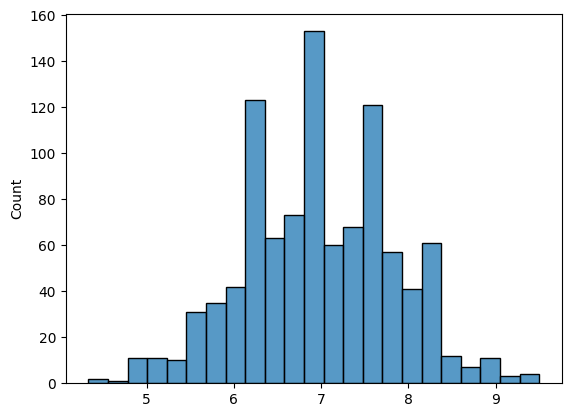

In [51]:
sns.histplot(means)

In [52]:
left = np.quantile(means, alpha/2)
right = np.quantile(means, 1 - alpha/2)

In [53]:
left, right

(4.833333333333333, 9.166666666666666)

## Построить 95% доверительный интервал для случайных бросков кубика

In [ ]:
dice = [1, 2, 3, 4, 5, 6]  # список граней кубика

In [ ]:
n = 10  # число бросков
alpha = 0.05  # уровень значимости
sample = np.random.choice(dice, size=n)  # генерация случайных бросков

In [ ]:
mean = sample.mean()  # среднее
mean

In [ ]:
std = sample.std(ddof=1)  # стандартное отклонение
std

In [ ]:
se = std/np.sqrt(n)  # стандартная ошибка

In [ ]:
quantile = st.t(n-1).ppf(1-alpha/2)  # квантиль уровня 2,5%
quantile

In [ ]:
delta = se * quantile  # дельта для оценки доверительного интервала

In [ ]:
(mean - delta).round(2), (mean + delta).round(2)  # доверительный интервал